# Perceptrons: The First Neural Network Model
Perceptrons are one of the earliest computational models of neural networks (NNs), and they form the basis for the more complex and deep networks we have today. Understanding the perceptron model and its theory is essential to understanding how more complex NNs work.

## Background: Biological Neural Networks
A biological neural network (such as the one we have in our brain) is composed of a large number of nerve cells called **neurons.** 

Each neuron receives electrical signals (impulses) from its neighboring neurons via fibers called **dendrites.** When the total sum of its incoming signals exceeds some threshold, the neuron "fires" its own signal via long fibers called **axons** that are connected to the dendrites of other neurons.

The junction between two neurons is called a **synapse.** On average, each neuron is connected to about 7,000 synapses, which demonstrates the high connectivity of the network we have in our brain. When we learn new associations between two concepts, the synaptic strength between the neurons that represent these concepts is strengthened. This phenomenon is known as Hebb's rule (1949) that states "Cells that fire together wire together".

<div style="align:center">
    <img src="media/neuron.png" width="600">
</div>

## The Perceptron Model
The perceptron model, introduced by Frank Rosenblatt in 1957, is a simplified model of a biological neuron.

The perceptron has $m$ binary inputs denoted by $x_1, \cdots, x_m$, which represent the incoming signals from its neighboring neurons, and it outputs a single binary value denoted by $o$ that indicates if the perceptron is "firing" or not.

<div style="align:center">
    <img src="media/perceptron.png" width="600">
</div>

Each input neuron $x_i$ is connected to the perceptron via a link whose strength is represented by a weight $w_i$. Inputs with higher weights have a larger influence on the perceptron's output. The perceptron first computes the weighted sum of its incoming signals, by multiplying each input by its corresponding weight. This weighted sum is often called net input and denoted by $z$:

$$z = \sum_{i=1}^m w_i x_i$$

If the net input exceeds some predefined threshold value $\theta$, then the perceptron fires (its output is 1), otherwise it doesn't fire (its output is 0). In other words, the perceptron fires if and only if:

$$z = \sum_{i=1}^m w_i x_i \geq \theta$$

Our goal is to find the weights $w_1, \cdots, w_m$ and the threshold $\theta$, such that the perceptron will map correctly its inputs $x_1, \cdots, x_m$ (representing the features in our data) to the desired output $y$ (representing the label).

To simplify the learning process, instead of having to learn separately the weights and the threshold, we add a special input neuron called **bias neuron** that always outputs the value 1. This neuron is typically denoted by $x_0$ and its connection weight is denoted by $b$ or $w_0$.

As a result, the net input of the perceptron becomes:

$$z = \sum_{i=0}^m w_i x_i = w_0 x_0 + w_1 x_1 + \cdots + w_m x_m$$

where $x_0 = 1$ and $w_0 = b$.

In vector form, we can write $z$ as the dot product between the input vector $x$ and the weight vector $w$:

$$z = w^T \cdot x + b$$

where $w = [w_0, w_1, \cdots, w_m]^T$ and $x = [x_0, x_1, \cdots, x_m]^T$. And the perceptron fires if and only if the net input is non-negative, i.e.,

$$z = w^T \cdot x + b \geq 0$$

More generally, the perceptron applies an **activation function $f(z)$** on the net input that generates its output. The two most common activation functions used in perceptrons are:

1. The **step function** (also known as the **heaviside function**) is a function whose value is 0 for negative inputs and 1 for non-negative inputs:

<div style="align:center">
    <img src="media/step.png" width="300">
</div>

2. The sign function is a function whose value is -1 for negative inputs and 1 for non-negative inputs:

<div style="align:center">
    <img src="media/sign.png" width="300">
</div>

## Perceptrons as Linear Classifiers
The perceptron is a type of a linear classifier, since it divides the input space into two areas separated by the following hyperplane:

$$w^T \cdot x + b = 0$$

The weight vector $w$ is orthogonal to this hyperplane, and thus determines its orientation, while the bias $b$ defines its distance from the origin. Every example above the hyperplane $(w^t x + b > 0)$ is classified by the perceptron as a positive example, while every example below the hyperplane $(w^t x + b < 0)$ is classified as a negative example.

<div style="align:center">
    <img src="media/hyperplane.png" width="300">
</div>

**Linear classifiers** are capable of learning only linearly separable problems, i.e., problems where the decision boundary between the positive and the negative examples is a linear surface (a hyperplane). For example, the following data set is not linearly separable, therefore a perceptron cannot classify correctly all the examples in this data set:

<div style="align:center">
    <img src="media/non-linear.png" width="300">
</div>

## The Perceptron Learning Rule
The perceptron has a simple learning rule that is guaranteed to find the separating hyperplane if the data is linearly separable. For each training sample $(x_i, y_i)$ that is misclassified by the perceptron (i.e., $o_i \neq y_i$), we apply the following update rule to the weight vector:

$$w \leftarrow w + \alpha (y_i - o_i) x_i$$

where $\alpha$ is a learning rate $(0 < \alpha <= 1)$ that controls the size of the weight adjustment in each update.

## Perceptron Implementation in Python
Let’s now implement the perceptron learning algorithm in Python.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.base import BaseEstimator
from sklearn.datasets import make_blobs

In [2]:
class Perceptron(BaseEstimator):
    def __init__(self, alpha, n_epochs):
        self.alpha = alpha        # the learning rate
        self.n_epochs = n_epochs  # number of training iterations
        
    def fit(self, X, y):
        (n, m) = X.shape  # n is the number of samples, m is the number of features
        
        # Initialize the weights to small random values
        self.w = np.random.randn(m)
        self.b = 0
        
        # The training loop
        for epoch in range(self.n_epochs):
            n_errors = 0  # number of misclassification errors
            
            for i in range(n):
                o = self.predict(X[i])
                if o != y[i]:
                    # Apply the perceptron learning rule
                    self.w += self.alpha * (y[i] - o) * X[i]
                    self.b += self.alpha * (y[i] - o)
                    n_errors += 1
            
            # Compute the accuracy on the training set
            accuracy = 1 - (n_errors / n)
            print(f'Epoch {epoch + 1}: accuracy = {accuracy:.3f}')
            
            # Stop the training when there are no more errors
            if n_errors == 0:
                break
                
    def predict(self, X):
        z = X @ self.w + self.b
        return np.heaviside(z, 1)  # the step function

Let’s now test our implementation on a data set generated by the `make_blobs()` function from Scikit-Learn.

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=0.5)

Text(0, 0.5, '$x_2$')

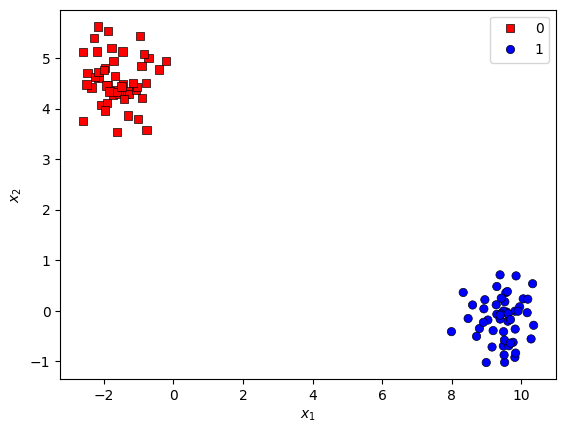

In [5]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [6]:
perceptron = Perceptron(alpha=0.01, n_epochs=10)
perceptron.fit(X, y)

Epoch 1: accuracy = 0.950
Epoch 2: accuracy = 1.000


In [7]:
def plot_decision_boundary(model, X, y):
    # Retrieve the model parameters
    w1, w2, b = model.w[0], model.w[1], model.b

    # Calculate the intercept and slope of the separating line
    slope = -w1 / w2
    intercept = -b / w2
        
    # Plot the line
    x1 = X[:, 0]
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() - 0.2, x1.max() + 0.2
    x2_min, x2_max = x2.min() - 0.5, x2.max() + 0.5
    x1_d = np.array([x1_min, x1_max])
    x2_d = slope * x1_d + intercept

    # Fill the two classification areas with two different colors
    plt.plot(x1_d, x2_d, 'k', ls='--')
    plt.fill_between(x1_d, x2_d, x2_min, color='blue', alpha=0.25)
    plt.fill_between(x1_d, x2_d, x2_max, color='red', alpha=0.25)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    
    # Draw the data points
    sns.scatterplot(x=x1, y=x2, hue=y, style=y, markers=('s', 'o'), 
                    palette=('r', 'b'), edgecolor='black')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

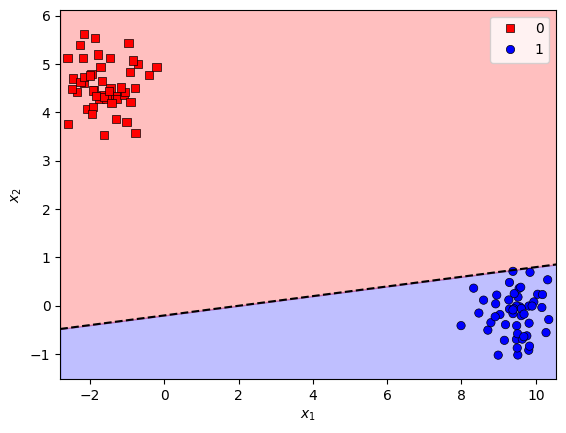

In [8]:
plot_decision_boundary(perceptron, X, y)

## Limitations of the Perceptron Model
Although the perceptron model has shown some initial success, it was quickly realized that perceptrons cannot learn some simple functions such as the `XOR` function:

<div style="align:center">
    <img src="media/xor.png" width="600">
</div>

The XOR problem is not linearly separable, therefore linear models such as perceptrons cannot solve it.